In [1]:
import os, numpy as np
import pandas as pd
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, Dropout
from keras.utils import np_utils
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow as tf

Using TensorFlow backend.
C:\Users\sua91\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\sua91\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\sua91\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\sua91\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

In [2]:
data = pd.read_csv('dataset.csv', encoding = 'utf8')

In [3]:
print('The number of data: ', len(data))

The number of data:  301


In [4]:
categories = ['1', '2', '3']
nb_classes = len(categories)

In [5]:
data['type'] = data['type'].replace(['protein', 'RNA', 'sequence'], [1, 2, 3])
data[:5]

,text,type
0,Survey Applications NGS Whole Genome Sequencin...,1
1,Differential Expression PKD Associated Genes A...,3
2,Possibility Use Public Microarray Database Ide...,1
3,CaGe A Web Based Cancer Gene Annotation System...,1
4,Decreases Casz mRNA siRNA Complex Do Alter Blo...,1


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    301 non-null    object
 1   type    301 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 4.8+ KB


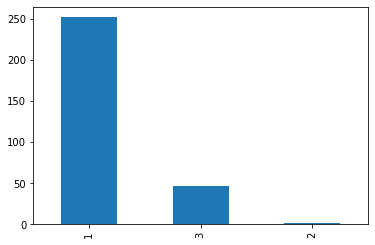

In [7]:
data['type'].value_counts().plot(kind='bar')

In [8]:
print(data.groupby('type').size().reset_index(name='count'))

   type  count
0     1    252
1     2      2
2     3     47


In [9]:
# x와 y 분리
X_data = data['text']
y_data = data['type']
print('The number of text: {}'.format(len(X_data)))
print('The number of type_label: {}'.format(len(y_data)))

The number of text: 301
The number of type_label: 301


In [10]:
y_data = np_utils.to_categorical(y_data, nb_classes + 1)  # one-hot vector 변형
print(y_data)

[[0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 ...
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]]


In [11]:
max_word = 2000

tok = Tokenizer(num_words = max_word)
tok.fit_on_texts(X_data)

In [12]:
sequences = tok.texts_to_sequences(X_data)
print(len(sequences[0]))
print(sequences[0])

1621
[933, 268, 235, 8, 31, 15, 1094, 266, 461, 11, 39, 324, 2, 15, 1094, 14, 657, 350, 8, 800, 1135, 1, 419, 8, 10, 1193, 263, 1895, 270, 335, 11, 268, 444, 567, 917, 7, 461, 235, 8, 670, 884, 769, 15, 1094, 11, 324, 246, 430, 1326, 1958, 235, 8, 891, 410, 31, 891, 410, 31, 4, 108, 701, 670, 884, 769, 203, 8, 31, 4, 86, 723, 11, 39, 27, 268, 534, 513, 39, 8, 525, 6, 444, 126, 376, 568, 670, 884, 769, 1958, 450, 221, 1959, 4, 444, 153, 1420, 1421, 11, 324, 618, 903, 11, 31, 235, 8, 15, 838, 4, 362, 145, 8, 153, 800, 1532, 183, 740, 235, 8, 447, 1055, 289, 32, 1, 277, 41, 444, 1278, 492, 203, 3, 670, 884, 769, 235, 8, 867, 92, 1, 525, 414, 447, 41, 6, 444, 126, 376, 203, 183, 186, 41, 49, 293, 525, 447, 450, 336, 41, 444, 1420, 1488, 15, 1532, 121, 186, 183, 39, 851, 39, 621, 800, 11, 39, 27, 225, 11, 1056, 18, 17, 1181, 903, 1959, 40, 11, 1045, 48, 741, 11, 39, 27, 225, 11, 263, 34, 411, 213, 22, 8, 294, 22, 8, 7, 436, 776, 9, 106, 294, 5, 490, 22, 8, 134, 1109, 903, 11, 31, 1194, 461,

In [13]:
X_data = sequences
print('max_len : %d' % max(len(l) for l in X_data))

max_len : 2936


In [14]:
max_len = 2936
sequences_matrix = sequence.pad_sequences(sequences, maxlen=max_len)
print(sequences_matrix)
print(sequences_matrix[0])
print(len(sequences_matrix[0]))

[[   0    0    0 ...   39  851  186]
 [   0    0    0 ...  860 1113   15]
 [   0    0    0 ...  366 1297    3]
 ...
 [   0    0    0 ...  794   31  168]
 [   0    0    0 ... 1067   18  300]
 [   0    0    0 ... 1088  101  299]]
[  0   0   0 ...  39 851 186]
2936


In [15]:
print(len(tok.word_index))

X_train, X_test, y_train, y_test = train_test_split(sequences_matrix, y_data, test_size=0.2)

print(X_train.shape)
print(y_train.shape)

21291
(240, 2936)
(240, 4)


# LSTM으로 G&I 코퍼스 분류하기

In [16]:
model = Sequential()

model.add(Embedding(max_word, 64, input_length=max_len))
model.add(LSTM(120))
model.add(Dropout(0.2))
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(4, activation='softmax'))

early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
checkpoint = ModelCheckpoint('best_model.h5', monitor="val_loss", mode='max', verbose=1, save_best_only=True)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 2936, 64)          128000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 120)               88800     
_________________________________________________________________
dropout_1 (Dropout)          (None, 120)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 50)                6050      
_________________________________________________________________
dropout_2 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 204       
Total params: 223,054
Trainable params: 223,054
Non-trainable params: 0
________________________________________________

In [18]:
history = model.fit(X_train, y_train, batch_size=256, epochs=20, callbacks=[checkpoint, early_stopping], validation_split=0.2)


Train on 192 samples, validate on 48 samples
Epoch 1/20
192/192 [==============================] - 26s 136ms/step - loss: 1.3927 - accuracy: 0.0990 - val_loss: 1.3819 - val_accuracy: 0.5417

Epoch 00001: val_loss improved from -inf to 1.38190, saving model to best_model.h5
Epoch 2/20
192/192 [==============================] - 29s 149ms/step - loss: 1.3816 - accuracy: 0.4479 - val_loss: 1.3740 - val_accuracy: 0.8333

Epoch 00002: val_loss did not improve from 1.38190
Epoch 3/20
192/192 [==============================] - 34s 175ms/step - loss: 1.3722 - accuracy: 0.7812 - val_loss: 1.3648 - val_accuracy: 0.8125

Epoch 00003: val_loss did not improve from 1.38190
Epoch 4/20
192/192 [==============================] - 32s 165ms/step - loss: 1.3629 - accuracy: 0.8073 - val_loss: 1.3535 - val_accuracy: 0.8125

Epoch 00004: val_loss did not improve from 1.38190
Epoch 5/20
192/192 [==============================] - 34s 177ms/step - loss: 1.3497 - accuracy: 0.8281 - val_loss: 1.3387 - val_accura

In [19]:
print("accuracy : %.4f" % (model.evaluate(X_test, y_test)[1]))

61/61 [==============================] - 18s 302ms/step
accuracy : 0.8525


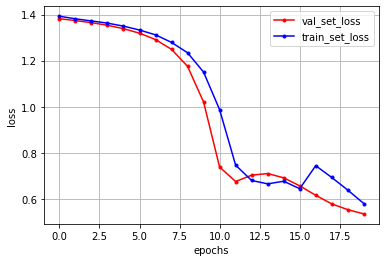

In [20]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, marker='.', c='red', label='val_set_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='train_set_loss')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()
plt.show()